In [1]:
%pip install tqdm

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from processing_functions import create_df_M5
df_M5 = create_df_M5()

In [ ]:
import strategy_runner
from strategies.DTP_Strategy import DTP
from datetime import datetime
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

trades_database = {}

params = {
    "stopMethods": [2], # [1, 2],
    "slInTicks": [25,50,75,100],
    "tpInTicks": [25,50,75,100],
    "onlyUSSession": [True, False]
}
use3UT = False
useAllEntryPoints = False

strategy = DTP(df_M5[:350_000], use3UT, useAllEntryPoints)
iteration = 1
for sm in params["stopMethods"]:
    for sl in params["slInTicks"]:
        for tp in params["tpInTicks"]:
            for onlyUSSession in params["onlyUSSession"]:
                if tp/sl < 1.6: # On ne veut que des trade avec un risk ratio >= à 1
                    start_time = datetime.now()
                    print(f'parameters: sl={sl}, tp={tp}, US_hours_only={onlyUSSession}, sm={sm} are being tested...')
                    trades = strategy_runner.strategyLoop(strategy, sl, tp, onlyUSSession, stopMethod=sm)
                    trades_database[iteration] = [trades, sl, tp, onlyUSSession, sm]
                    end_time = datetime.now()
                    print(f'iteration n°{iteration} finished in {end_time-start_time}')
                    iteration+=1


parameters: sl=25, tp=25, US_hours_only=True, sm=2 are being tested...
iteration n°1 finished in 0:01:29.705482
parameters: sl=25, tp=25, US_hours_only=False, sm=2 are being tested...
iteration n°2 finished in 0:02:55.396519
parameters: sl=50, tp=25, US_hours_only=True, sm=2 are being tested...
iteration n°3 finished in 0:01:26.159525
parameters: sl=50, tp=25, US_hours_only=False, sm=2 are being tested...
iteration n°4 finished in 0:02:54.232397
parameters: sl=50, tp=50, US_hours_only=True, sm=2 are being tested...
iteration n°5 finished in 0:01:26.785282
parameters: sl=50, tp=50, US_hours_only=False, sm=2 are being tested...
iteration n°6 finished in 0:02:50.052571
parameters: sl=50, tp=75, US_hours_only=True, sm=2 are being tested...
iteration n°7 finished in 0:01:25.708805
parameters: sl=50, tp=75, US_hours_only=False, sm=2 are being tested...
iteration n°8 finished in 0:03:01.773370
parameters: sl=75, tp=25, US_hours_only=True, sm=2 are being tested...
iteration n°9 finished in 0:0

In [5]:
### SAVE THE DATA ###
import pickle 
def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

### LOAD THE DATA ###
def load_object(filename):
    with open(filename, 'rb') as input: 
        return pickle.load(input)

In [6]:
save_object(trades_database, 'trade_datas/basicEntries_1UT_levels_breakeven=0_StrategyStop2.pkl')

In [12]:
trades_database = load_object('trade_datas/basicEntries_3UT_levels_breakeven=0_StrategyStop1&2.pkl')
# BEST WINRATE SO FAR : trades_database_basic_no_3UT_levels.pkl with 0.5813

In [ ]:
from processing_functions import create_winrate_dictionnary

In [9]:
print('basicEntries_3UT_levels_breakeven=0_StrategyStop1&2')
trades_database = load_object('trade_datas/basicEntries_3UT_levels_breakeven=0_StrategyStop1&2.pkl')
winrate_dictionnary = create_winrate_dictionnary(trades_database, 2)
pd.DataFrame.from_dict(winrate_dictionnary, orient='index')

basicEntries_3UT_levels_breakeven=0_StrategyStop1&2


,winrate (%),risk_ratio,total_pnl_from_start (%),avg_gain_from_start (%),avg_loss_from_start (%),median duration,75percent duration,avg_real_sl_executed,TP/SL (Ticks),nbr wins/loss/breakeven,stop_method,US_session_only
1,46.541,1.00,6.57,0.18,-0.13,0 days 00:25:00,0 days 00:45:00,28.852140,"(25, 25)","(222, 255, 2)",1,True
15,41.414,1.33,7.54,0.28,-0.13,0 days 01:15:00,0 days 02:25:00,43.000000,"(100, 75)","(82, 116, 1)",1,True
25,44.835,1.00,8.55,0.19,-0.12,0 days 00:25:00,0 days 00:45:00,27.378277,"(25, 25)","(217, 267, 0)",2,True
39,40.099,1.33,9.36,0.30,-0.12,0 days 01:05:00,0 days 02:20:00,39.243902,"(100, 75)","(81, 121, 2)",2,True
23,42.132,1.00,10.75,0.29,-0.11,0 days 01:15:00,0 days 02:25:00,42.904348,"(100, 100)","(83, 114, 1)",1,True
47,40.594,1.00,12.67,0.30,-0.10,0 days 01:07:30,0 days 02:23:45,39.221311,"(100, 100)","(82, 120, 2)",2,True
3,50.756,0.50,15.98,0.18,-0.12,0 days 00:30:00,0 days 00:55:00,33.000000,"(25, 50)","(235, 228, 2)",1,True
7,41.538,1.50,16.18,0.36,-0.15,0 days 01:00:00,0 days 02:00:00,38.326797,"(75, 50)","(108, 152, 1)",1,True
31,39.552,1.50,17.34,0.37,-0.13,0 days 00:55:00,0 days 01:50:00,35.731707,"(75, 50)","(106, 162, 2)",2,True
27,49.153,0.50,17.42,0.19,-0.11,0 days 00:25:00,0 days 00:50:00,30.762500,"(25, 50)","(232, 240, 0)",2,True


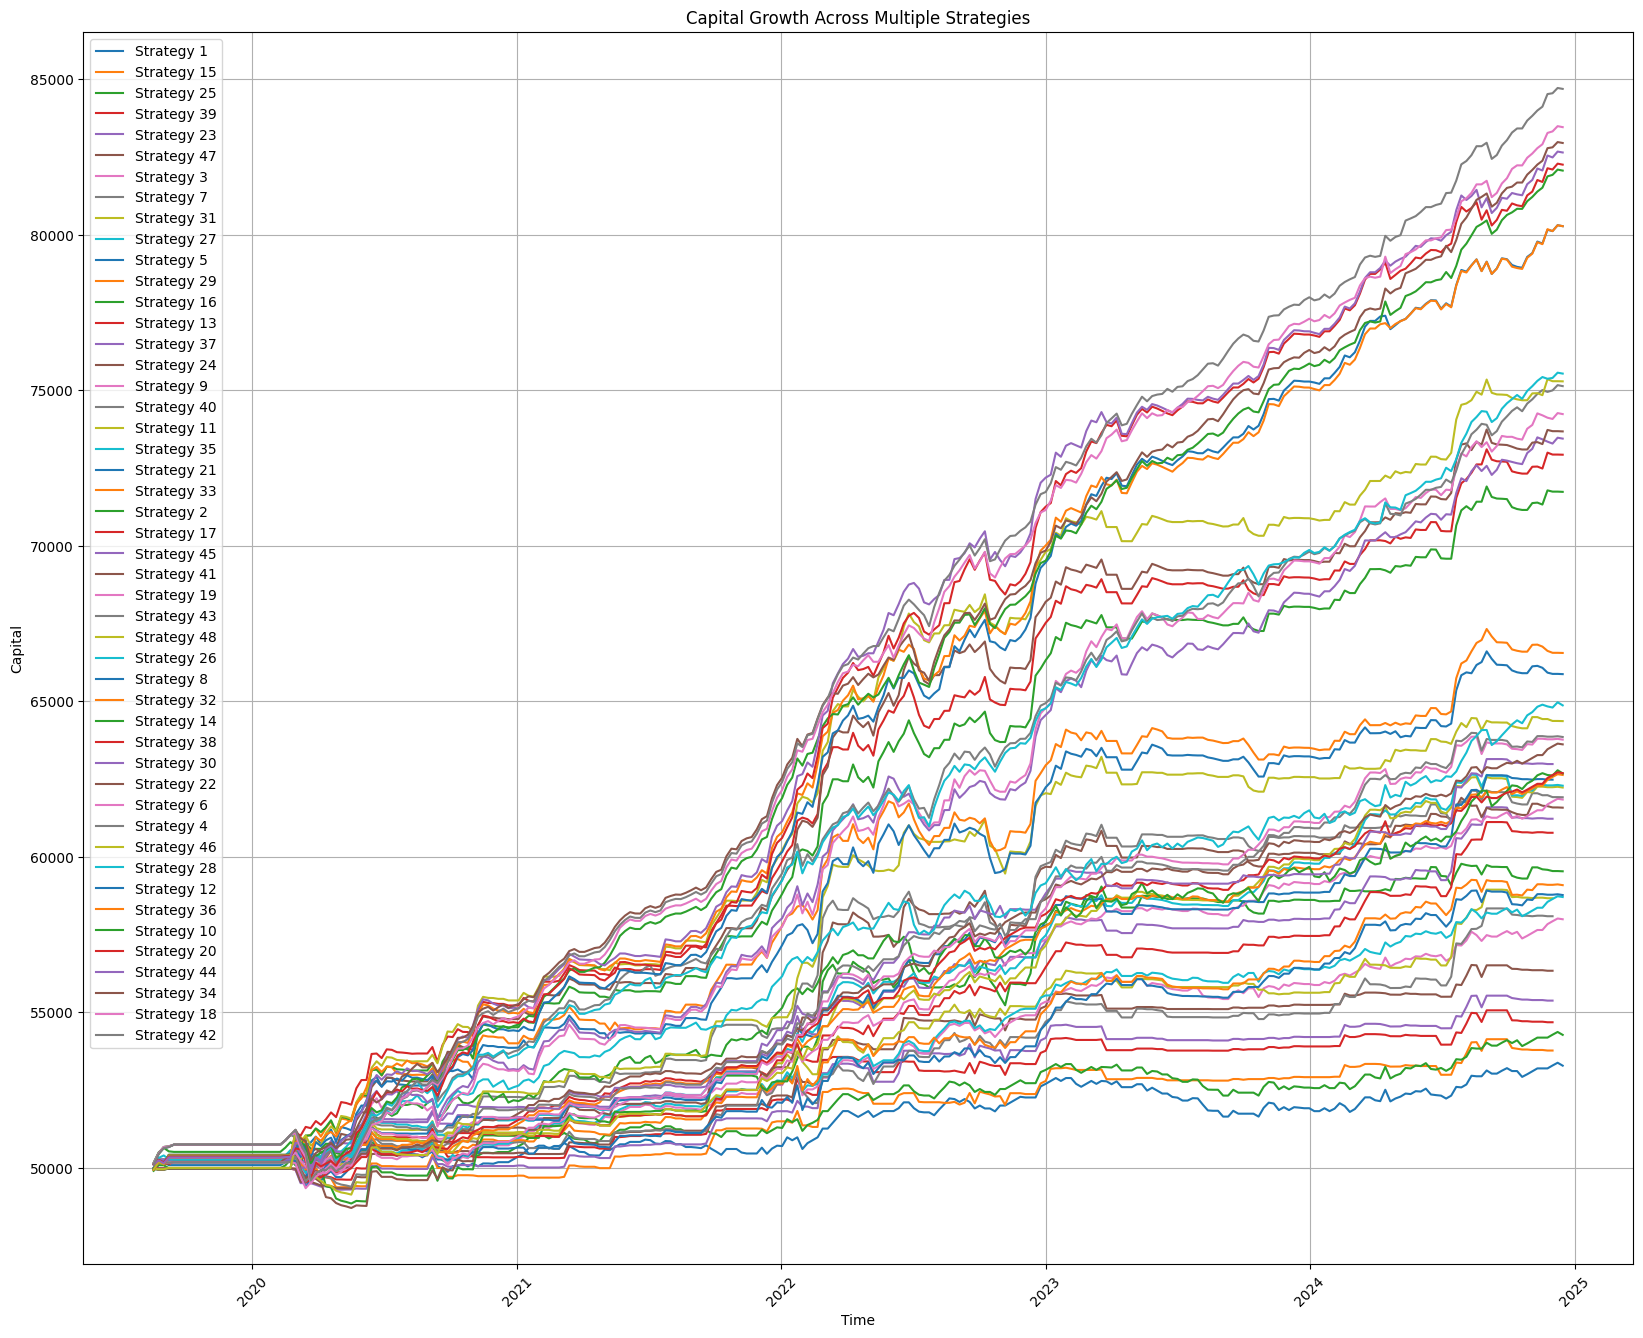

In [39]:
import matplotlib.pyplot as plt
trades_database = load_object('trade_datas/basicEntries_3UT_levels_breakeven=0_StrategyStop1&2.pkl')
# selected_ids = [8,14]
selected_ids = winrate_dictionnary.keys()

plt.figure(figsize=(20, 16))

for id in selected_ids:
    df_temp =  trades_database[id][0]

    # Définir 'datetime' comme index pour pouvoir utiliser resample
    df_temp.set_index('entry_date', inplace=True)

    # Resampler les données par semaine (par exemple, la somme des profits par semaine)
    df_temp = df_temp.resample('W').agg({'profit_from_start(%)': ['sum']})

    capital = 50_000
    l = []
    for profit in df_temp['profit_from_start(%)']["sum"]:
        capital += 50_000 * profit/ 100
        l.append(capital)

    plt.plot(df_temp.index, l, label=f"Strategy {id}")  # Use a label for each plot for better identification

    del df_temp

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Capital")
plt.xticks(rotation=45)
plt.title("Capital Growth Across Multiple Strategies")
plt.legend()  # Show legend for all plots
plt.grid(True)
plt.show()

In [7]:
print('basicEntries_1UT_levels_breakeven=0_StrategyStop2')
trades_database = load_object('trade_datas/basicEntries_1UT_levels_breakeven=0_StrategyStop2.pkl')
winrate_dictionnary = create_winrate_dictionnary(trades_database, 2)
pd.DataFrame.from_dict(winrate_dictionnary, orient='index')

basicEntries_1UT_levels_breakeven=0_StrategyStop2


,winrate (%),risk_ratio,total_pnl_from_start (%),avg_gain_from_start (%),avg_loss_from_start (%),median duration,75percent duration,avg_real_sl_executed,TP/SL (Ticks),nbr wins/loss/breakeven,stop_method,US_session_only
1,43.982,1.00,13.14,0.18,-0.12,0 days 00:20:00,0 days 00:40:00,27.233918,"(25, 25)","(402, 512, 1)",2,True
15,38.889,1.33,21.45,0.38,-0.13,0 days 00:55:00,0 days 02:00:00,40.343915,"(100, 75)","(119, 187, 2)",2,True
7,36.674,1.50,23.05,0.38,-0.14,0 days 00:50:00,0 days 01:37:30,36.453571,"(75, 50)","(161, 278, 2)",2,True
23,39.344,1.00,27.02,0.39,-0.11,0 days 00:55:00,0 days 02:00:00,40.224599,"(100, 100)","(120, 185, 2)",2,True
3,48.023,0.50,28.72,0.18,-0.11,0 days 00:25:00,0 days 00:50:00,30.885033,"(25, 50)","(425, 460, 1)",2,True
5,38.354,1.00,31.56,0.31,-0.11,0 days 00:40:00,0 days 01:15:00,32.380000,"(50, 50)","(247, 397, 3)",2,True
13,38.568,1.00,33.99,0.38,-0.11,0 days 00:50:00,0 days 01:40:00,37.388060,"(75, 75)","(167, 266, 2)",2,True
21,38.889,0.75,40.53,0.38,-0.09,0 days 00:50:00,0 days 01:40:00,37.390977,"(75, 100)","(168, 264, 2)",2,True
9,49.033,0.33,43.01,0.18,-0.08,0 days 00:25:00,0 days 00:50:00,31.082405,"(25, 75)","(431, 448, 1)",2,True
11,39.780,0.67,43.27,0.31,-0.09,0 days 00:45:00,0 days 01:20:00,32.803109,"(50, 75)","(253, 383, 3)",2,True


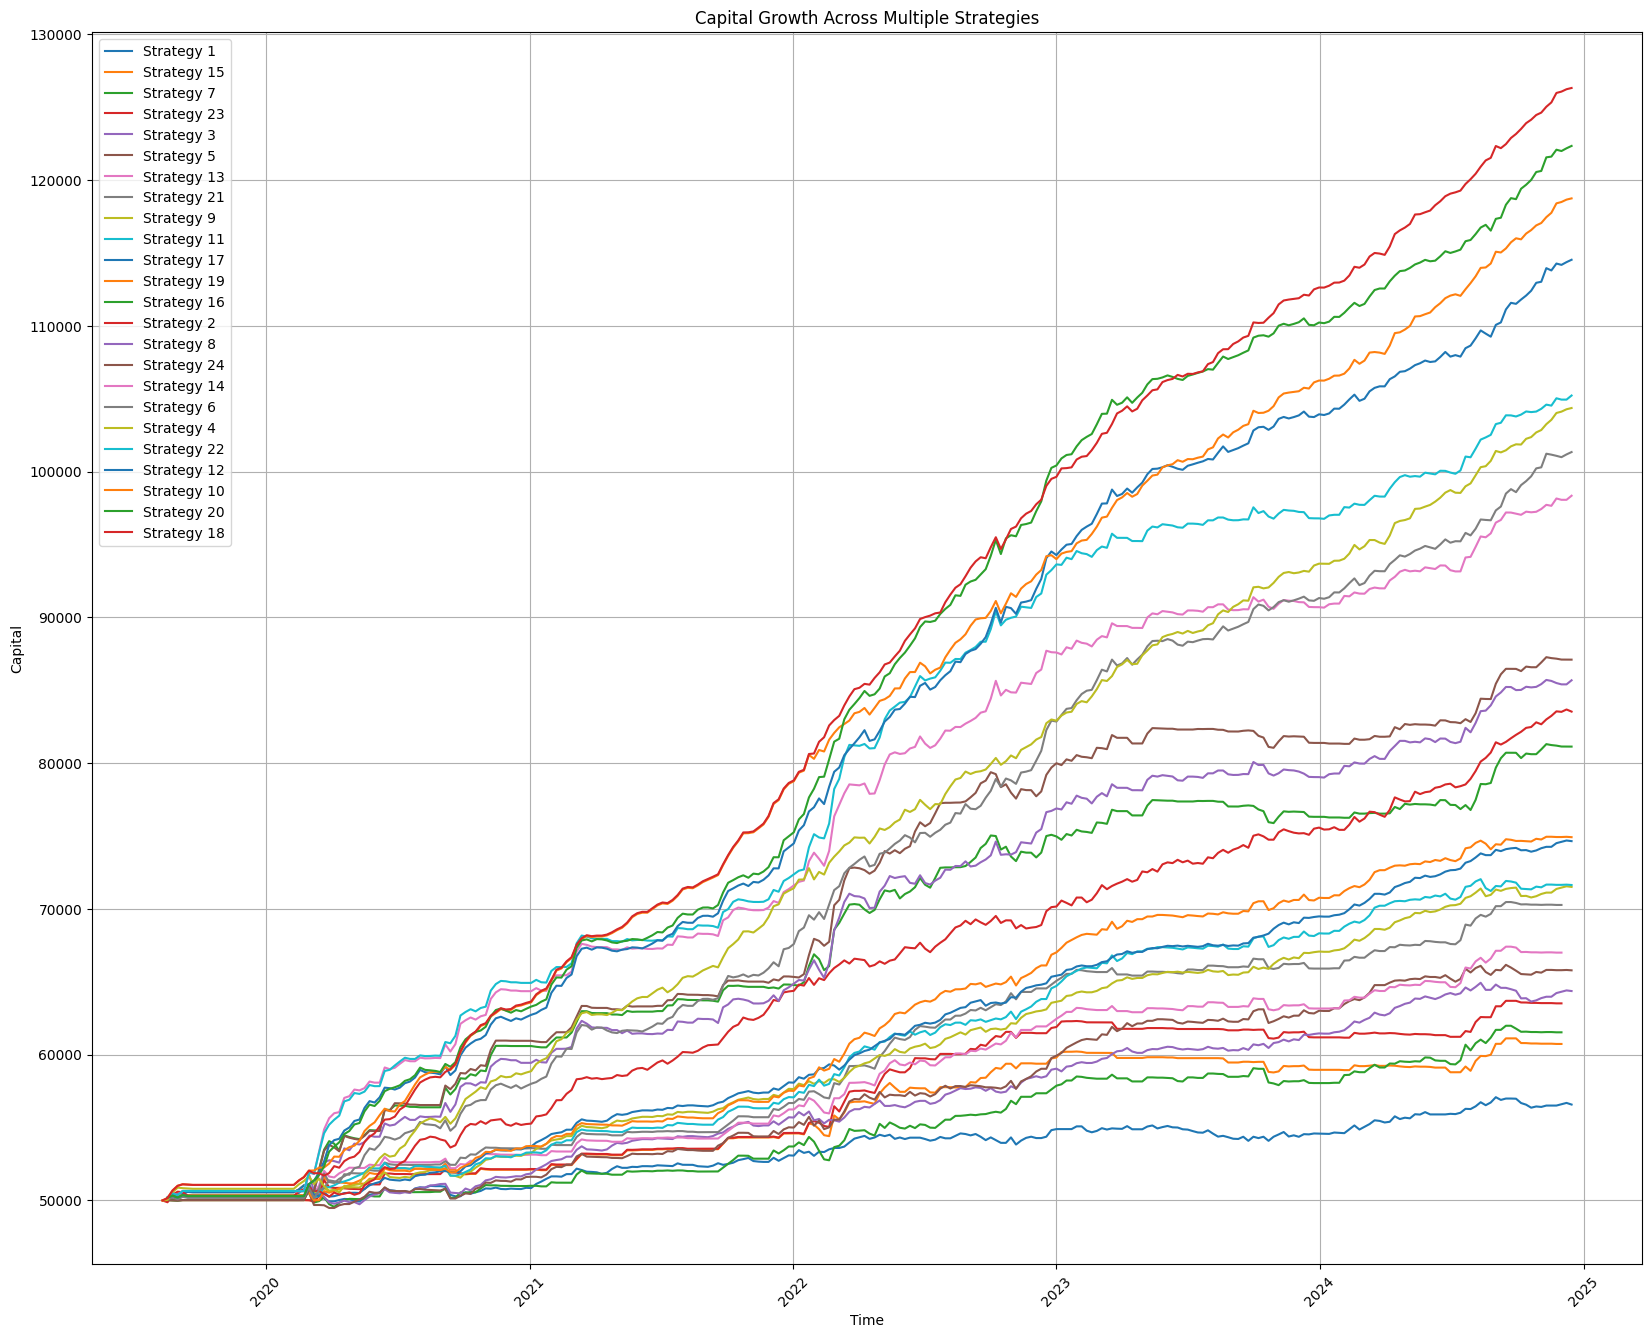

In [8]:
import matplotlib.pyplot as plt
#trades_database = load_object('trade_datas/basicEntries_3UT_levels_breakeven=0_StrategyStop2.pkl')
# selected_ids = [8,14]
selected_ids = winrate_dictionnary.keys()

plt.figure(figsize=(20, 16))

for id in selected_ids:
    df_temp =  trades_database[id][0]

    # Définir 'datetime' comme index pour pouvoir utiliser resample
    df_temp.set_index('entry_date', inplace=True)

    # Resampler les données par semaine (par exemple, la somme des profits par semaine)
    df_temp = df_temp.resample('W').agg({'profit_from_start(%)': ['sum']})

    capital = 50_000
    l = []
    for profit in df_temp['profit_from_start(%)']["sum"]:
        capital += 50_000 * profit/ 100
        l.append(capital)

    plt.plot(df_temp.index, l, label=f"Strategy {id}")  # Use a label for each plot for better identification

    del df_temp

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Capital")
plt.xticks(rotation=45)
plt.title("Capital Growth Across Multiple Strategies")
plt.legend()  # Show legend for all plots
plt.grid(True)
plt.show()

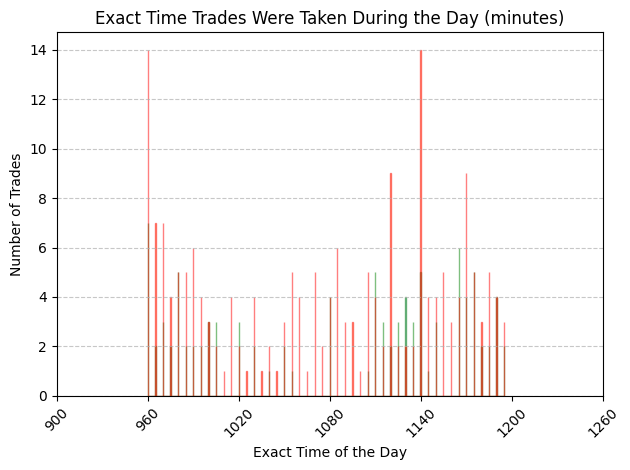

In [14]:
import matplotlib.pyplot as plt

id = 7
df, _, _, _ = trades_database[id]

df_hist_w = df[df['profit_from_start(%)']>0]['entry_date'].apply(lambda x: x.hour*60 + x.minute)
df_hist_l = df[df['profit_from_start(%)']<0]['entry_date'].apply(lambda x: x.hour*60 + x.minute)

# Plot the histogram
plt.hist(df_hist_w, bins=1440, edgecolor='green', alpha=0.5)
plt.hist(df_hist_l, bins=1440, edgecolor='red', alpha=0.5)

plt.xlabel('Exact Time of the Day')
plt.ylabel('Number of Trades')
plt.title('Exact Time Trades Were Taken During the Day (minutes)')
plt.xticks(range(900, 1320, 60), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ensures labels fit inside the plot
plt.show()

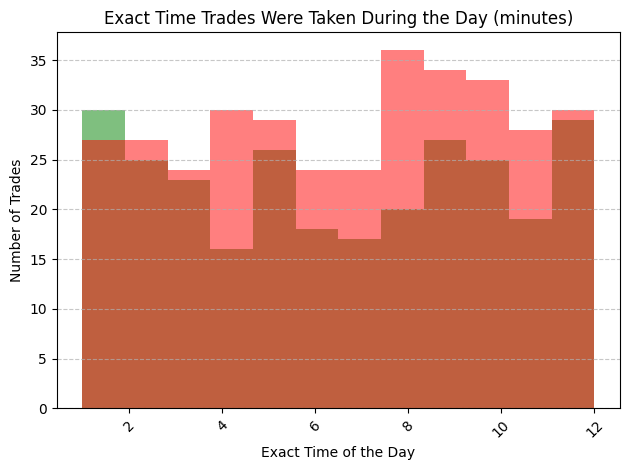

In [5]:
import matplotlib.pyplot as plt

id = 18
df, _, _, _ = trades_database[id]

df_hist_w = df[df['profit_from_start(%)']>0]['entry_date'].dt.month
df_hist_l = df[df['profit_from_start(%)']<0]['entry_date'].dt.month
months = ['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre']
# Plot the histogram
plt.hist(df_hist_w, bins=12, color='green', alpha=0.5)
plt.hist(df_hist_l, bins=12, color='red', alpha=0.5)

plt.xlabel('Exact Time of the Day')
plt.ylabel('Number of Trades')
plt.title('Exact Time Trades Were Taken During the Day (minutes)')
plt.xticks(rotation=45, )#ticks=range(1, 13), labels=months)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ensures labels fit inside the plot
plt.show()

choses à faire pour continuer à backtest :
- avoir le temps moyen d'un trade avec la stratégie DTP
- regarder si le type de position (short ou long) a un impact sur le winrate
- continuer à améliorer la stratégie avec:
    - les autres conditions d'entrées de la strat DTP (ex: taille de la bougie)
    - des conditions sur les niveaux pivot
    - des conditions pour savoir si on est en range
    - faire en sorte que le tp/sl s'adapte à la distance au pivot
- calculer le profit réel en $
- stop loss suiveur : passe en breakeven sous certaines conditions